###     

In [6]:
#!pip install ucimlrepo

###  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from ucimlrepo import fetch_ucirepo
sns.set_theme()

### 1. Скачиваем набор данных (Forty Soybean Cultivars from Subsequent Harvests)

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [16]:
from ucimlrepo import fetch_ucirepo
from pathlib import Path

file = '/soybeans.csv'

# fetch dataset
if Path(file).exists():
  stuff = pd.read_csv(file)
else:
  stuff = fetch_ucirepo(id=913)
  stuff = stuff.data['original']
  stuff.to_csv(file)
# metadata
print(type(stuff))

# инфа о переменных
print(stuff.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0', 'Season', 'Cultivar', 'Repetition', 'PH', 'IFP', 'NLP',
       'NGP', 'NGL', 'NS', 'MHG', 'GY'],
      dtype='object')


Season      - Сезон (1 или 2)    
Cultivar    - Сорт    
Repetition	- Число повторений   
PH	- Высота растения    
IFP	- Высота первого стручка    
NLP	- Количество стеблей   
NGP	- Количество бобов     
NGL	- Количество зерен на растение   
NS	- Количество зерен на стручок   
MHG	- Вес на тысячу семян   
GY	- Урожай (кг/га)   

### 2. Загружаем данные в датафрейм

In [ ]:
df = stuff.data['original']
pd.set_option('display.max_columns', 30)
df.head()

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


### 3. Выводим статистическую информацию о данных

In [ ]:
df.describe(include='all')

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
unique,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NEO 760 CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.500000,NaN,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,NaN,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,NaN,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,NaN,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,NaN,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,NaN,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931


### Выводим названия столбцов и строк

In [ ]:
display(pd.Series(data = df.columns, name = 'Столбцы'))
display(pd.Series(data = df.index, name = 'Строки'))

,Столбцы
0,Season
1,Cultivar
2,Repetition
3,PH
4,IFP
5,NLP
6,NGP
7,NGL
8,NS
9,MHG


,Строки
0,0
1,1
2,2
3,3
4,4
...,...
315,315
316,316
317,317
318,318


In [ ]:
# посмотрим, есть ли строки с пустыми признаками
df.info()
df.isnull().sum()
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


## 4. Категориальные данные заменим на количественные

In [ ]:
enc = OrdinalEncoder()
df[['Cultivar']] = enc.fit_transform(df[['Cultivar']])
df.head()

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,31.0,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,31.0,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,31.0,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,31.0,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,28.0,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


# ***делаем красивое***

<Axes: >

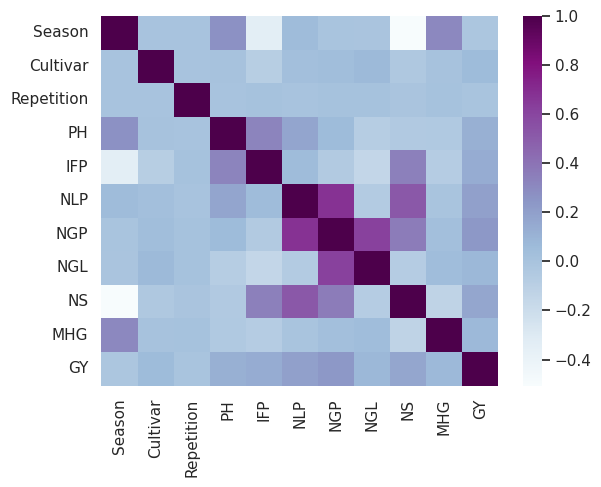

In [ ]:
sns.heatmap(df.corr(numeric_only = True), cmap='BuPu')

Здесь будет вывод

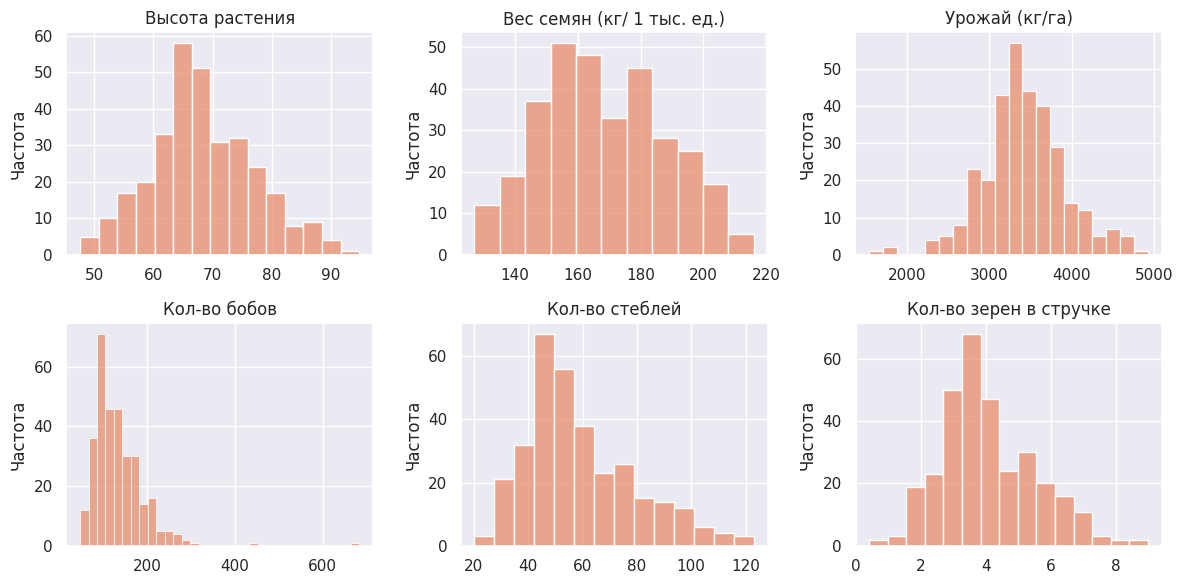

In [ ]:
sns.set_palette('flare')

fig1, axe1 = plt.subplots(1, 3, figsize=(12, 6))

sns.histplot(ax=axe1[0, 0], x=df.PH)
axe1[0, 0].set_xticks([50, 60, 70, 80, 90])
axe1[0, 0].set_ylabel('Частота')
axe1[0, 0].set_xlabel('')
axe1[0, 0].set_title('Высота растения')

sns.histplot(ax=axe1[0, 1], x=df.MHG)
axe1[0, 1].set_ylabel('Частота')
axe1[0, 1].set_xlabel('')
axe1[0, 1].set_title('Вес семян (кг/ 1 тыс. ед.)')

sns.histplot(ax=axe1[0, 2], x=df.GY)
axe1[0, 2].set_ylabel('Частота')
axe1[0, 2].set_xlabel('')
axe1[0, 2].set_title('Урожай (кг/га)')

sns.histplot(ax=axe1[1, 0], x=df.NGP)
axe1[1, 0].set_ylabel('Частота')
axe1[1, 0].set_xlabel('')
axe1[1, 0].set_title('Кол-во бобов')

sns.histplot(ax=axe1[1, 1], x=df.NLP)
axe1[1, 1].set_ylabel('Частота')
axe1[1, 1].set_xlabel('')
axe1[1, 1].set_title('Кол-во стеблей')

sns.histplot(ax=axe1[1, 2], x=df.NS)
axe1[1, 2].set_ylabel('Частота')
axe1[1, 2].set_xlabel('')
axe1[1, 2].set_title('Кол-во зерен в стручке')

fig1.tight_layout()

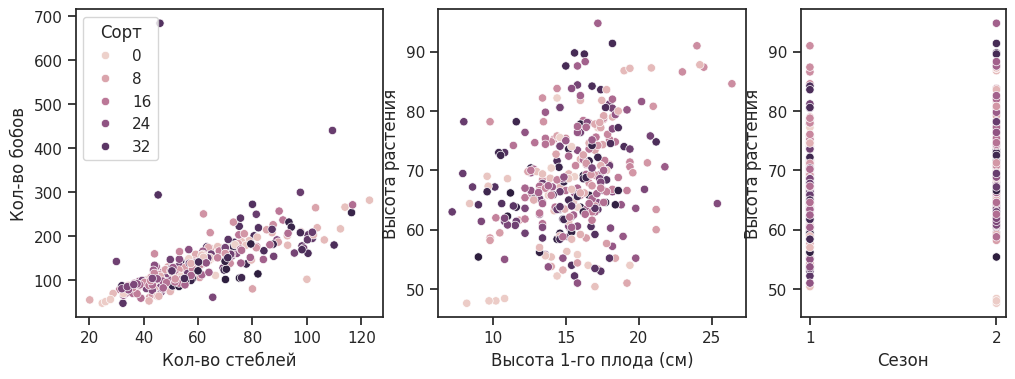

In [ ]:
fig2, axe2 = plt.subplots(1, 3, figsize=(12, 4),  width_ratios=[3, 3, 2])

sns.scatterplot(data=df, x='NLP', y='NGP', hue='Cultivar', ax=axe2[0])
axe2[0].set_ylabel('Кол-во бобов')
axe2[0].set_xlabel('Кол-во стеблей')
axe2[0].legend(title='Сорт')

sns.scatterplot(data=df, x='IFP', y='PH', hue='Cultivar', ax=axe2[1])
axe2[1].set_ylabel('Высота растения')
axe2[1].set_xlabel('Высота 1-го плода (см)')
axe2[1].get_legend().remove()

sns.scatterplot(data=df, x='Season', y='PH', hue='Cultivar', ax=axe2[2])
axe2[2].set_ylabel('Высота растения')
axe2[2].set_xlabel('Сезон')
axe2[2].set_xticks([1, 2])
axe2[2].get_legend().remove()

plt.show()
fig2.tight_layout()

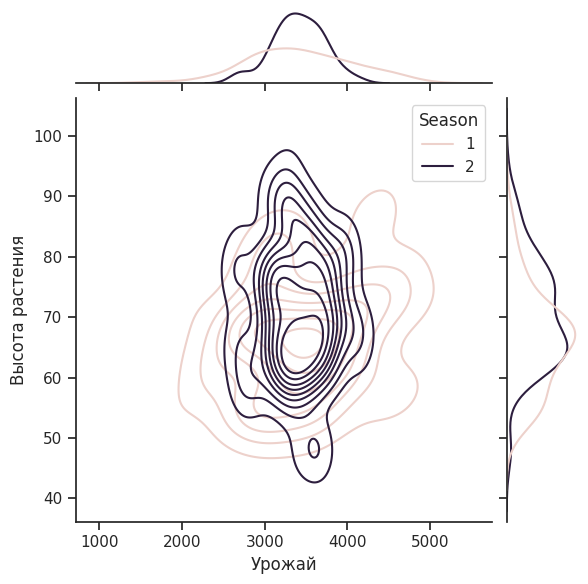

In [ ]:
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="GY", y="PH", hue="Season",
    kind="kde"
)

g.set_axis_labels(xlabel='Урожай', ylabel='Высота растения')

plt.show(g)

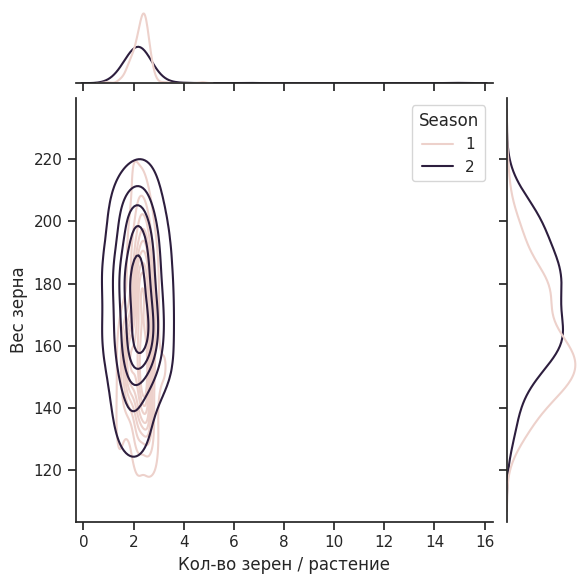

In [ ]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="NGL", y="MHG", hue="Season",
    kind="kde"
)

g.set_axis_labels(xlabel='Кол-во зерен / растение', ylabel='Вес зерна')

plt.show(g)

<Axes: xlabel='Season', ylabel='IFP'>

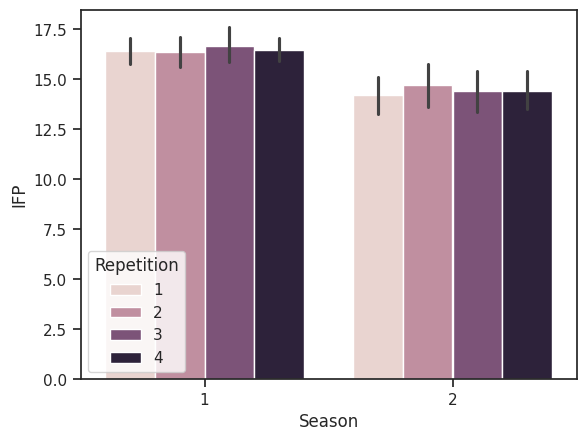

In [ ]:
# Plot the responses for different events and regions
sns.barplot( x="Season", y="IFP",
             hue="Repetition",
             data=df)